# Practica 2: Codificacion sin perdidas

In [9]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
from skimage.color import rgb2gray, rgb2ycbcr


image_path = "/Users/carlosedm10/projects/college/TDSC/Files/i1.png"

In [10]:
def image_to_binary(image, export_file: str, color: bool = False):
    """
    Codifica una imagen RGB en un archivo binario.

    :param nombre_im: Nombre del fichero que contiene la imagen a codificar
    :param export_file: Nombre del fichero que contendrá la secuencia de bits generada
    :param color: 1 para codificar las componentes RGB, 0 para solo la componente Y
    """
    # Cargar la imagen
    rows, columns, channels = image.shape

    # Normalizar si es necesario
    if image.dtype == np.float32 or image.dtype == np.float64:
        image = (image * 255).astype(np.uint8)
    elif image.dtype != np.uint8:
        image = image.astype(np.uint8)

    # Convertir a escala de grises si solo se necesita la componente Y
    if not color:
        # Usar ponderación para calcular la luminancia (Y)
        image = np.dot(image[..., :3], [0.2125, 0.7154, 0.0721]).astype(np.uint8)

        # image = rgb2gray(image)

    # Escribir en el archivo binario
    with open(export_file, "wb") as fid:
        # Escribir dimensiones y número de canales como uint16
        fid.write(np.uint16(rows).tobytes())
        fid.write(np.uint16(columns).tobytes())
        fid.write(np.uint16(channels).tobytes())

        # Escribir los datos de los canales en el orden R, G, B
        if color:
            fid.write(image[..., 0].tobytes())  # Componente R
            fid.write(image[..., 1].tobytes())  # Componente G
            fid.write(image[..., 2].tobytes())  # Componente B
        else:
            fid.write(image.tobytes())  # Solo la componente Y


def save_image_as_png(image: np.ndarray, output_file: str):
    """
    Saves a numpy array as a PNG image.
    """
    # Use PIL to save the image
    img = Image.fromarray(image)
    img.save(output_file, format="PNG")


def binary_to_image(binary_file: str, color: bool = False):
    """
    Reads a binary file and returns a black and white version of the image.
    """
    # Open the file in binary read mode
    with open(binary_file, "rb") as fid:
        # Read the number of rows, columns, and channels as uint16
        rows = int(np.frombuffer(fid.read(2), dtype=np.uint16)[0])
        columns = int(np.frombuffer(fid.read(2), dtype=np.uint16)[0])
        channels = int(np.frombuffer(fid.read(2), dtype=np.uint16)[0])

        # Read the image data
        data = np.frombuffer(fid.read(rows * columns * channels), dtype=np.uint8)

        if channels == 3 and color:
            # Reconstruir RGB
            image = np.zeros((rows, columns, 3), dtype=np.uint8)
            image[..., 0] = data[: rows * columns].reshape((rows, columns))  # R
            image[..., 1] = data[rows * columns : 2 * rows * columns].reshape(
                (rows, columns)
            )  # G
            image[..., 2] = data[2 * rows * columns :].reshape((rows, columns))  # B
            save_image_as_png(image, "output_image.png")
        elif channels == 1 or not color:
            image = data.reshape((rows, columns))
            save_image_as_png(image, "output_bw_image.png")
        else:
            raise ValueError("Unexpected channel configuration in binary file.")

        return image

# Codify and decodify without losses

In [11]:
image = plt.imread(image_path)

# Importing the image
image_to_binary(image, "bw_i1.bin")
decodified_bw = binary_to_image(
    "bw_i1.bin",
)
# Mostrar la imagen en blanco y negro
plt.imshow(decodified_bw, cmap="grey")
plt.axis("off")
plt.show()

RGB2GRAY [[0.49836039 0.48184784 0.48380431 ... 0.48521098 0.49585961 0.50762431]
 [0.51404667 0.48463059 0.47287294 ... 0.48017333 0.48716824 0.49529412]
 [0.50620353 0.48687059 0.48323882 ... 0.49193804 0.47454745 0.47846902]
 ...
 [0.32085412 0.3894702  0.35667608 ... 0.31496039 0.35724941 0.29842588]
 [0.32840667 0.34519412 0.25778078 ... 0.25389686 0.31496039 0.27265647]
 [0.26566157 0.28020902 0.27430039 ... 0.25921725 0.27714353 0.24997529]]


ValueError: cannot reshape array of size 1087488 into shape (708,512)

# RGB Codification

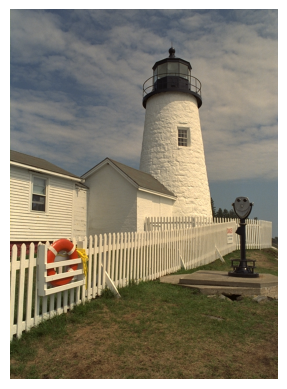

In [ ]:
image_to_binary(image, "i1.bin", True)

decodified_bw = binary_to_image("i1.bin", True)
# Mostrar la imagen en blanco y negro
plt.imshow(decodified_bw)
plt.axis("off")
plt.show()